In [3]:
import os
import itertools
import matplotlib.pyplot as plt
import pandas as pd 
import pvlib
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib import tracking
from pvlib.bifacial.pvfactors import pvfactors_timeseries
from pvlib import temperature
from pvlib import pvsystem
import warnings

from pvlib.iotools import read_tmy3
from matplotlib import rcParams


rcParams['figure.figsize'] = 20, 6
rcParams['lines.linewidth'] = 2.5

In [483]:
df_roof = pd.read_csv("Auto-Production Toiture et Consommation de bâtiment GreEn-ER-data-2023-06-06 14_26_55.csv")
df_roof


,Time,Production instantanée toiture réelle (kW)
0,2023-03-01 00:00:00,0.000
1,2023-03-01 01:00:00,0.000
2,2023-03-01 02:00:00,0.000
3,2023-03-01 03:00:00,0.000
4,2023-03-01 04:00:00,0.000
...,...,...
2204,2023-05-31 21:00:00,9.730
2205,2023-05-31 22:00:00,1.410
2206,2023-05-31 23:00:00,0.123
2207,2023-06-01 00:00:00,0.000


In [484]:
data_frame_roof = df_roof.copy()
data_frame_roof['Time'] = pd.to_datetime(data_frame_roof.Time, format ='%Y-%m-%d %H:%M:%S') 
data_frame_roof.set_index('Time', inplace=True)
data_frame_roof.sort_index(inplace=True)
# data_frame_roof = data_frame_roof.resample('1H').mean().interpolate(method='time')

In [485]:
# data_frame_roof = data_frame_roof.loc[data_frame_roof.index <= "2023-05-31"]
real  = data_frame_roof.values

In [519]:
df_onduleur = pd.read_csv('pv_inverters_energy (1).csv')
df_onduleur.columns = ['Time',	'Onduleur A: energie totale (MWh)',	'Onduleur B: energie totale (MWh)',	'Onduleur C: energie totale (MWh)',	'Onduleur D-A: energie totale (MWh)',	'Onduleur D-B: energie totale (MWh)',	'Onduleur: energie totale (MWh)']


In [520]:
# data_frame_roof = df_roof.copy()
df_onduleur['Time'] = pd.to_datetime(df_onduleur.Time, format ='%Y-%m-%d %H:%M:%S') 
df_onduleur.set_index('Time', inplace=True)
df_onduleur.sort_index(inplace=True)


In [521]:
df_onduleur

,Onduleur A: energie totale (MWh),Onduleur B: energie totale (MWh),Onduleur C: energie totale (MWh),Onduleur D-A: energie totale (MWh),Onduleur D-B: energie totale (MWh),Onduleur: energie totale (MWh)
Time,,,,,,
2022-08-25 14:30:00+00:00,0.231450,0.280032,0.357824,0.233804,0.235982,70.296
2022-08-25 14:40:00+00:00,0.231450,0.282428,0.362510,0.236145,0.238356,87.171
2022-08-25 14:50:00+00:00,0.231450,0.284693,0.367078,0.238473,0.240650,68.058
2022-08-25 15:00:00+00:00,0.231450,0.287023,0.371675,0.240801,0.242978,70.519
2022-08-25 15:10:00+00:00,0.231450,0.289431,0.376364,0.243162,0.245362,71.999
...,...,...,...,...,...,...
2023-06-05 20:20:00+00:00,29.998266,21.294687,31.701115,21.013477,21.230942,125.224
2023-06-05 20:30:00+00:00,29.998562,21.294909,31.701406,21.013731,21.231102,125.227
2023-06-05 20:40:00+00:00,29.998741,21.295050,31.701593,21.013893,21.231228,125.228


## First method

In [7]:
latitude = 45.166672 # Latitude Grenoble
longitude = 5.71667  # Longitude Grenoble
timezone = 'Europe/Paris'
altitude = 212

Text(0.5, 1.0, 'Ineichen, climatological turbidity')

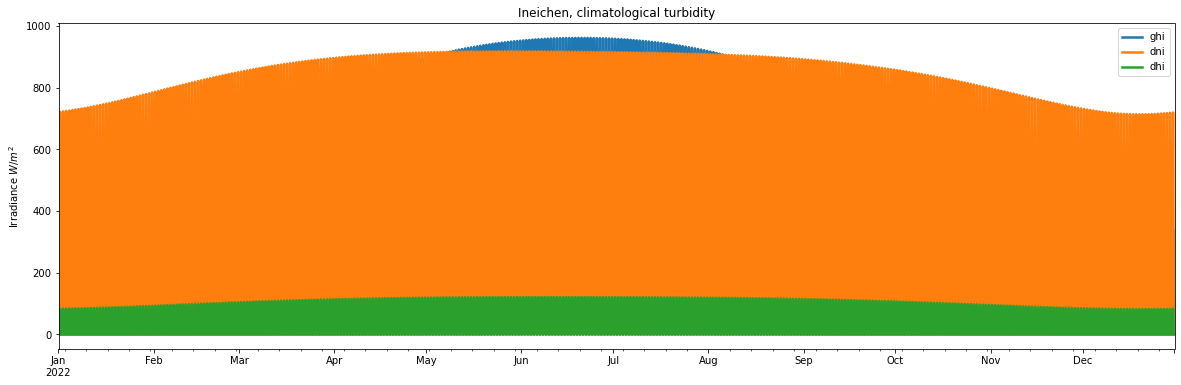

In [39]:
gre = Location(latitude, longitude, timezone, altitude, 'Grenoble')
time_range= pd.date_range(start='2022-01-01', end= '2022-12-31', freq='1h', tz = gre.tz)

cs_z = gre.get_clearsky(time_range, model='simplified_solis')
cs_z.plot()
plt.ylabel('Irradiance $W/m^2$')
plt.title('Ineichen, climatological turbidity')

# plt.title('Ineichen, climatological turbidity')

<ipython-input-2-f4e827ecb6ba>:49: pvlibDeprecationWarning: The pvlib.bifacial.pvfactors_timeseries function was deprecated in pvlib 0.9.1 and will be removed soon. Use pvlib.bifacial.pvfactors.pvfactors_timeseries instead.
  irrad = pvlib.bifacial.pvfactors_timeseries(solar_position['azimuth'],


<AxesSubplot:title={'center':'rendement'}, ylabel='DC Power'>

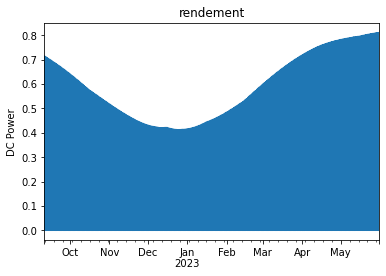

In [2]:


# supressing shapely warnings that occur on import of pvfactors
warnings.filterwarnings(action='ignore', module='pvfactors')


lat = 45.166672 # Latitude Grenoble
lon = 5.71667  # Longitude Grenoble
tz = 'Etc/GMT+2'
altitude = 212

times = pd.date_range('2022-09-11', '2023-06-01', freq='1T', tz=tz)

# create location object and get clearsky data
site_location = location.Location(lat, lon, tz=tz, name='Grenoble')
cs = site_location.get_clearsky(times)

# get solar position data
solar_position = site_location.get_solarposition(times)

# set ground coverage ratio and max_angle to
# pull orientation data for a single-axis tracker
gcr = 0.35
max_phi = 60
orientation = tracking.singleaxis(solar_position['apparent_zenith'],
                                  solar_position['azimuth'],
                                  max_angle=max_phi,
                                  backtrack=True,
                                  gcr=gcr
                                  )

# set axis_azimuth, albedo, pvrow width and height, and use
# the pvfactors engine for both front and rear-side absorbed irradiance
axis_azimuth = 135
pvrow_height = 3
pvrow_width = 4
albedo = 0.2

# explicity simulate on pvarray with 3 rows, with sensor placed in middle row
# users may select different values depending on needs
irrad = pvlib.bifacial.pvfactors_timeseries(solar_position['azimuth'],
                             solar_position['apparent_zenith'],
                             orientation['surface_azimuth'],
                             orientation['surface_tilt'],
                             axis_azimuth,
                             cs.index,
                             cs['dni'],
                             cs['dhi'],
                             gcr,
                             pvrow_height,
                             pvrow_width,
                             albedo,
                             n_pvrows=3,
                             index_observed_pvrow=1
                             )

# turn into pandas DataFrame
irrad = pd.concat(irrad, axis=1)

# using bifaciality factor and pvfactors results, create effective irradiance
bifaciality = 0.75
effective_irrad_bifi = irrad['total_abs_front'] + (irrad['total_abs_back']
                                                   * bifaciality)

# get cell temperature using the Faiman model
temp_cell = temperature.faiman(effective_irrad_bifi, temp_air=25,
                               wind_speed=1)

# using the pvwatts_dc model and parameters detailed above,
# set pdc0 and return DC power for both bifacial and monofacial
pdc0 = 1
gamma_pdc = -0.0043
pdc_bifi = pvsystem.pvwatts_dc(effective_irrad_bifi,
                               temp_cell,
                               pdc0,
                               gamma_pdc=gamma_pdc
                               ).fillna(0)
pdc_bifi.plot(title='rendement', ylabel='DC Power')

<AxesSubplot:title={'center':'rendement'}, ylabel='DC Power'>

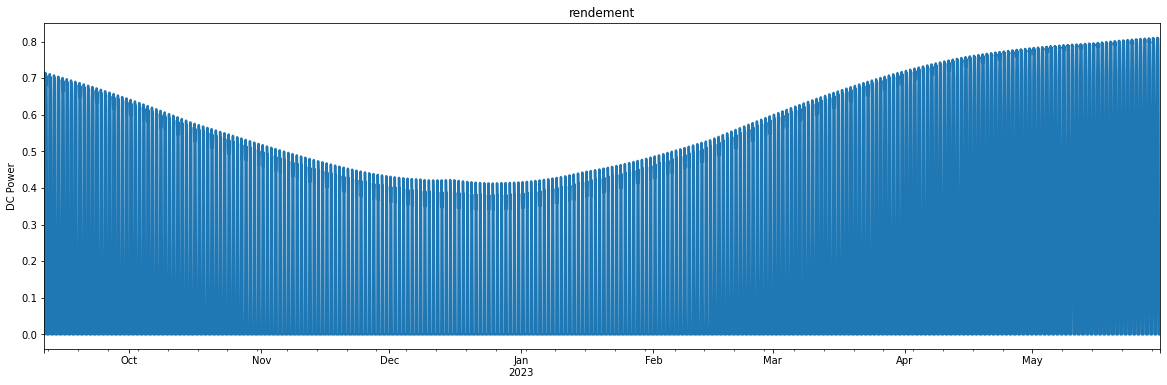

In [4]:
pdc_bifi.plot(title='rendement', ylabel='DC Power')

In [8]:
pdc_bifi2 = pdc_bifi*350*445
pdc_bifi2 /= 1000

<AxesSubplot:title={'center':'rendement'}, ylabel='Watt'>

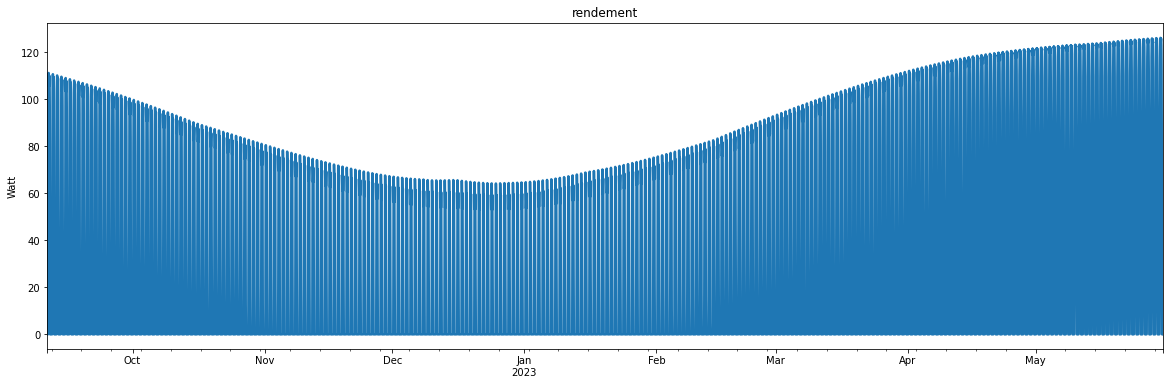

In [10]:
pdc_bifi2.plot(title='rendement', ylabel='Watt')

In [29]:
data_frame_roof = data_frame_roof.loc[data_frame_roof.index <= "2023-05-31"]
real  = data_frame_roof.values

In [28]:
pdc_bifi2 = pdc_bifi2.loc[pdc_bifi2.index >= "2023-05-01"]
pdc_bifi2 = pdc_bifi2.resample('1H').mean().interpolate(method='time')
pred = pdc_bifi2.values


In [31]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 74.98 RMSE


<AxesSubplot:title={'center':'rendement'}, xlabel='Time'>

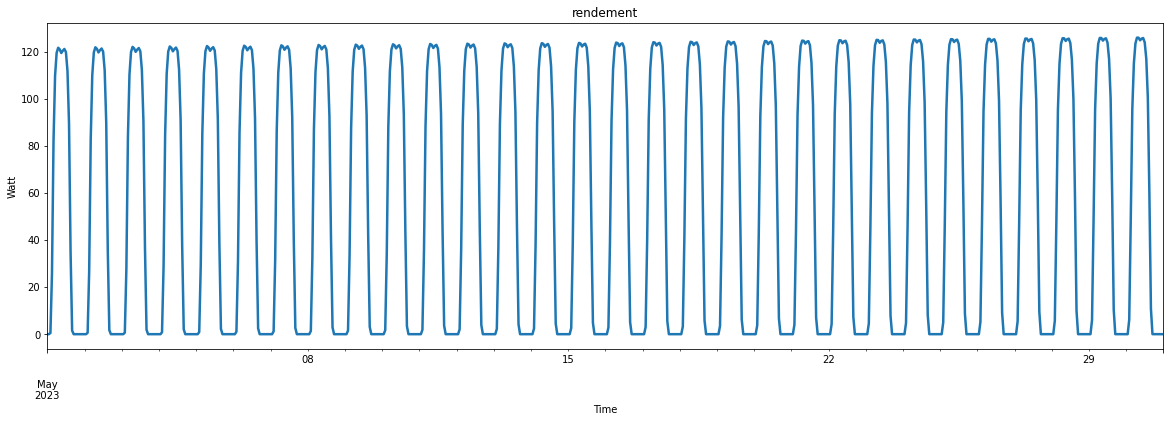

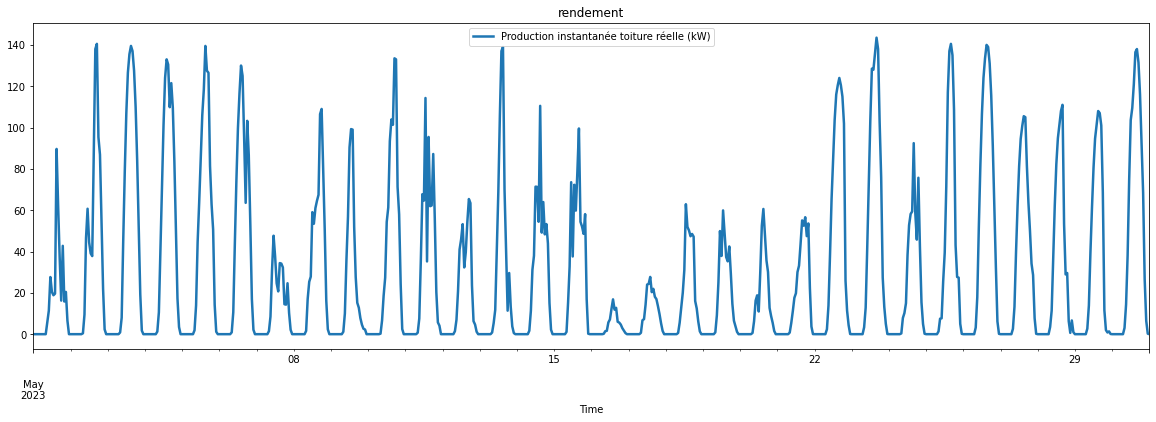

In [34]:
pdc_bifi2.plot(title='rendement', ylabel='Watt', xlabel = 'Time')
data_frame_roof.plot(title='rendement')

### Other approach

In [ ]:
latitude_degree,longitude_degree, altitude = 45.202371, 5.702818, 350

def pv_prod(latitude:float = 45.202371,longitude:float = 5.702818, altitude :float = 350,
           azimuth:float= 180, tilt:float = 30, max_power:float = 22,
            r_rate:float=30,meteo_data = None ):
    """
    latitude : latitude of the site to be studied (in decimal)
    longitude : longitude of the site to be studied (in decimal)
    azimuth : Azimuth of the panels (N = 0, S = 180)
    tilt:  the tilt angle of the PV panel
    max_power:  The rated capacity of the system
    r_rate: resampling rate in mins (data used has a sampling rate of 1 min)
    meteo_data: Meteo data, should be a dataframe  
    
    """

    module = pvlib.pvsystem.retrieve_sam('SandiaMod')['Schott_Solar_ASE_300_DGF_50__320___2007__E__']
    
    m_pow = (module["Impo"] * module["Vmpo"]) 
    
    inverter = pvlib.pvsystem.retrieve_sam('cecinverter')['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
    temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

    pv_system = pvlib.pvsystem.PVSystem(surface_tilt=tilt, surface_azimuth=azimuth,module_parameters=module, inverter_parameters=inverter,
                                        temperature_model_parameters=temperature_model_parameters)

    solar_position = pvlib.solarposition.get_solarposition(meteo_data.index,latitude_degree, longitude_degree, altitude)

    airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(altitude)


    absolute_airmass = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)

    solar_incidence_angle = pvlib.irradiance.aoi(tilt, azimuth, solar_position['zenith'], solar_position['azimuth'])


    cell_temperature = [pvlib.temperature.sapm_cell(meteo_data['Ray_Global_RSR2_Avg'][i],
                                meteo_data['AirTemp_Avg'][i], meteo_data['WSpd_Avg'][i],
                                    **temperature_model_parameters) for i in range(len(meteo_data.index))]

    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance( meteo_data["Ray_Direct_H_RSR2_Avg"],
                                    meteo_data["Ray_Diffus_RSR2_Avg"],absolute_airmass,solar_incidence_angle, module)

    df = pd.DataFrame({"effective_irradiance":effective_irradiance,
                      "cell_temperature":cell_temperature})

    pv_produced = pvlib.pvsystem.sapm(df["effective_irradiance"], df["cell_temperature"],module) # kW
    
    
    
    r_time = "{}min".format(r_rate)
    

    pv_produced = pv_produced.resample(r_time,label = "right").sum() / 60 # kWh
    
    pv_produced = pv_produced[pv_produced.index < '2021-01-01 00:00:00']
    pv_produced = pv_produced[pv_produced.index >= '2022-08-01 00:00:00']
    

    return (pv_produced ["p_mp"]* max_power)/(m_pow) 

## OTHER

### approch1

In [35]:
import pandas as pd

import numpy as np

# pvlib imports
import pvlib

from pvlib.pvsystem import PVSystem, FixedMount

from pvlib.location import Location

from pvlib.modelchain import ModelChain

from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [304]:

lat = 45.20 # Latitude Grenoble
lon = 5.70 # Longitude Grenoble
tz = 'Etc/GMT+2'
altitude = 212

times = pd.date_range('2022-09-11', '2023-06-01', freq='1H', tz=tz)

# create location object and get clearsky data
site_location = location.Location(lat, lon,  tz=tz, altitude = altitude, name='Grenoble')
cs = site_location.get_clearsky(times)

# location = Location(32.2, -110.9)

poorly_specified_system = PVSystem()

print(site_location)

Location: 
  name: Grenoble
  latitude: 45.2
  longitude: 5.7
  altitude: 212
  tz: Etc/GMT+2


In [40]:
print(poorly_specified_system)

PVSystem:
  name: None
  Array:
    name: None
    mount: FixedMount(surface_tilt=0, surface_azimuth=180, racking_model=None, module_height=None)
    module: None
    albedo: 0.25
    module_type: None
    temperature_model_parameters: {}
    strings: 1
    modules_per_string: 1
  inverter: None


In [50]:
sapm_system = PVSystem(
    module_parameters=sandia_module,
    inverter_parameters=cec_inverter,
    temperature_model_parameters=temperature_model_parameters)


mc = ModelChain( sapm_system, site_location)

In [51]:
print(mc)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [287]:
solar_position = site_location.get_solarposition(times)
weather = site_location.get_clearsky(times, solar_position = solar_position)

weather

,ghi,dni,dhi
2022-09-11 00:00:00-02:00,0.000000,0.000000,0.000000
2022-09-11 01:00:00-02:00,0.000000,0.000000,0.000000
2022-09-11 02:00:00-02:00,0.000000,0.000000,0.000000
2022-09-11 03:00:00-02:00,0.000000,0.000000,0.000000
2022-09-11 04:00:00-02:00,51.868023,168.936945,28.544579
...,...,...,...
2023-05-31 20:00:00-02:00,0.000000,0.000000,0.000000
2023-05-31 21:00:00-02:00,0.000000,0.000000,0.000000
2023-05-31 22:00:00-02:00,0.000000,0.000000,0.000000
2023-05-31 23:00:00-02:00,0.000000,0.000000,0.000000


In [243]:
mc.run_model(weather)

ModelChain: 
  name: None
  clearsky_model: simplifed_solis
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [244]:
mc.results.ac

2022-09-11 00:00:00-02:00   -0.075000
2022-09-11 01:00:00-02:00   -0.075000
2022-09-11 02:00:00-02:00   -0.075000
2022-09-11 03:00:00-02:00   -0.075000
2022-09-11 04:00:00-02:00    7.713157
                               ...   
2023-05-31 20:00:00-02:00   -0.075000
2023-05-31 21:00:00-02:00   -0.075000
2023-05-31 22:00:00-02:00   -0.075000
2023-05-31 23:00:00-02:00   -0.075000
2023-06-01 00:00:00-02:00   -0.075000
Freq: H, Length: 6313, dtype: float64

In [245]:
pvwatts_system = PVSystem(
    surface_tilt= 6, 
    surface_azimuth= 135,
    module_parameters={'pdc0': 160, 'gamma_pdc': -0.004},
    inverter_parameters={'pdc0': 160},
    temperature_model_parameters=temperature_model_parameters)


In [246]:
mc1 = ModelChain(pvwatts_system, site_location,
                aoi_model='physical', spectral_model='no_loss', transposition_model = 'Perez')

In [247]:
print(mc1)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: Perez
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [248]:
mc1.run_model(weather)

mc1.results.ac

2022-09-11 00:00:00-02:00    0.000000
2022-09-11 01:00:00-02:00    0.000000
2022-09-11 02:00:00-02:00    0.000000
2022-09-11 03:00:00-02:00    0.000000
2022-09-11 04:00:00-02:00    8.399636
                               ...   
2023-05-31 20:00:00-02:00    0.000000
2023-05-31 21:00:00-02:00    0.000000
2023-05-31 22:00:00-02:00    0.000000
2023-05-31 23:00:00-02:00    0.000000
2023-06-01 00:00:00-02:00    0.000000
Freq: H, Name: p_mp, Length: 6313, dtype: float64

In [249]:
sapm_system = PVSystem(
    surface_tilt= 6, 
    surface_azimuth= 135,
    module_parameters=sandia_module,
    inverter_parameters=cec_inverter,
    temperature_model_parameters=temperature_model_parameters)


mc = ModelChain(sapm_system, site_location, aoi_model='physical', spectral_model='no_loss', clearsky_model= 'simplifed_solis')

print(mc)

ModelChain: 
  name: None
  clearsky_model: simplifed_solis
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [250]:
mc.run_model(weather)

mc.results.ac

2022-09-11 00:00:00-02:00   -0.075000
2022-09-11 01:00:00-02:00   -0.075000
2022-09-11 02:00:00-02:00   -0.075000
2022-09-11 03:00:00-02:00   -0.075000
2022-09-11 04:00:00-02:00    7.712883
                               ...   
2023-05-31 20:00:00-02:00   -0.075000
2023-05-31 21:00:00-02:00   -0.075000
2023-05-31 22:00:00-02:00   -0.075000
2023-05-31 23:00:00-02:00   -0.075000
2023-06-01 00:00:00-02:00   -0.075000
Freq: H, Length: 6313, dtype: float64

In [251]:
df_pred = mc.results.ac
df_pred = df_pred.loc[df_pred.index >= "2023-05-01"]
df_pred = df_pred.loc[df_pred.index <= "2023-05-31"]
df_pred = df_pred.resample('1H').mean().interpolate(method='time')
pred = df_pred.values




In [252]:
data_frame_roof

,Production instantanée toiture réelle (kW)
Time,
2023-05-01 00:00:00,0.0000
2023-05-01 01:00:00,0.0000
2023-05-01 02:00:00,0.0000
2023-05-01 03:00:00,0.0000
2023-05-01 04:00:00,0.0000
...,...
2023-05-30 20:00:00,68.4000
2023-05-30 21:00:00,26.5500
2023-05-30 22:00:00,6.4900


In [253]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 81.70 RMSE


<AxesSubplot:title={'center':'production'}, xlabel='Time'>

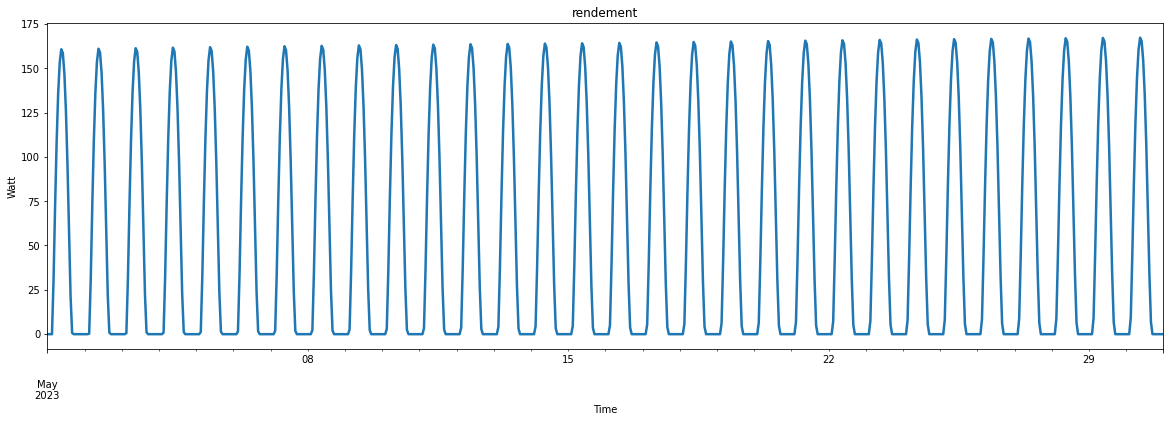

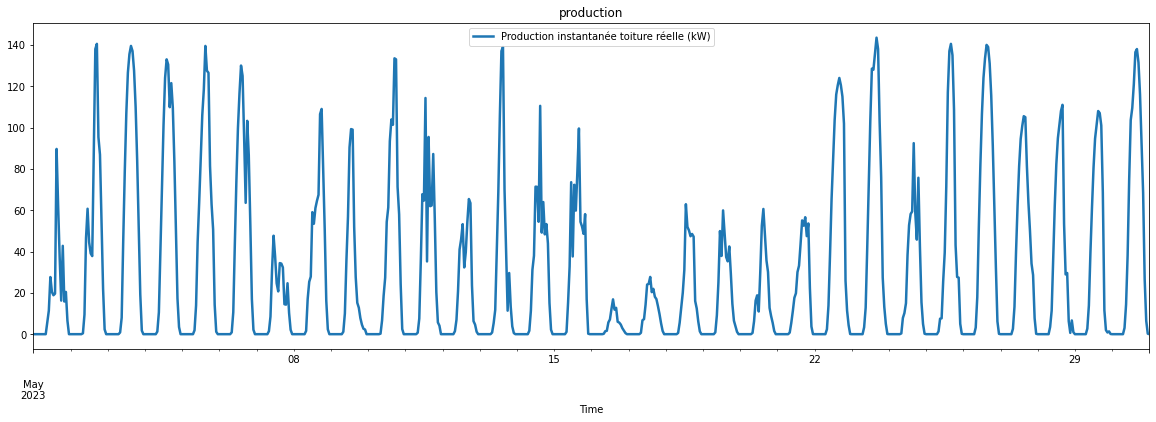

In [254]:
df_pred.plot(title='rendement', ylabel='Watt', xlabel = 'Time')
data_frame_roof.plot(title='production')

### approach 2
test avec ineichen model

In [ ]:
lat = 45.20 # Latitude Grenoble
lon = 5.70 # Longitude Grenoble
tz = 'Etc/GMT+2'
altitude = 212


In [531]:
times = pd.date_range('2023-03-01', '2023-06-01', freq='1H', tz=tz)

def physical_val(lat=45.20, lon=5.7, altitude=212, tz='Etc/GMT+2', times = times):

    # create location object and get clearsky data
    site_location = Location(lat, lon,  tz=tz, altitude = altitude, name='Grenoble')

    #compute solar position trough times 
    solar_position = site_location.get_solarposition(times)

    # Compute absolute airmass
    airmass_relative  = pvlib.atmosphere.get_relative_airmass(solar_position['zenith'])
    airmass_absolute = pvlib.atmosphere.get_absolute_airmass(airmass_relative)

    # Compute aoi
    incidence_angle = pvlib.irradiance.aoi(surface_tilt=6, surface_azimuth= 139, solar_zenith= solar_position['zenith'], 
                            solar_azimuth= solar_position['azimuth'])
    
    return solar_position,airmass_relative, airmass_absolute, incidence_angle, site_location





In [532]:
position, airmass_r, airmass_a, angle, location = physical_val()

In [533]:
def calcule_pred(model_clear_sky, solar_position, airmass_absolute, incidence_angle, site_location, power=183 ): 
    # cs = site_location.get_clearsky(times)

    irradiance = PVSystem.get_irradiance( sapm_system, solar_position['zenith'], solar_position['azimuth'], model_clear_sky['dni'], model_clear_sky['ghi'], model_clear_sky['dhi'])

    module = pvlib.pvsystem.retrieve_sam('SandiaMod')['Schott_Solar_ASE_300_DGF_50__320___2007__E__']
    # Compute effective irradiance
    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(irradiance['poa_direct'], irradiance['poa_diffuse'], airmass_absolute, 
                                                  incidence_angle, module )

    # celltemp = pvlib.pvsystem.sapm_celltemp(irradiance['poa_direct'], wind, temperature)
    m_pow = (module["Impo"] * module["Vmpo"]) 
    
    df_pred=solar_position.copy()

    pv_produced = pvlib.pvsystem.sapm(effective_irradiance, 25, module)
    pv_produced ["p_mp"] = (pv_produced ["p_mp"]* power)/(m_pow/1000) 

    pv_produced ["p_mp"] /=1000  # kWh

    df_pred['power'] = pv_produced['p_mp']

    df_pred = df_pred.loc[df_pred.index >= "2023-03-01"]
    df_pred = df_pred.loc[df_pred.index <= "2023-06-01"]
    df_pred = df_pred['power']
    

    return df_pred

In [534]:
linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, lat, lon, filepath=None, interp_turbidity=True)

In [535]:
model_perez = pvlib.clearsky.ineichen(solar_position['apparent_zenith'], airmass_a, linke_turbidity, altitude=0, dni_extra=1364.0, perez_enhancement=False)

In [536]:
pred = calcule_pred(model_perez, position, airmass, angle, location ).values

In [537]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 65.63 RMSE


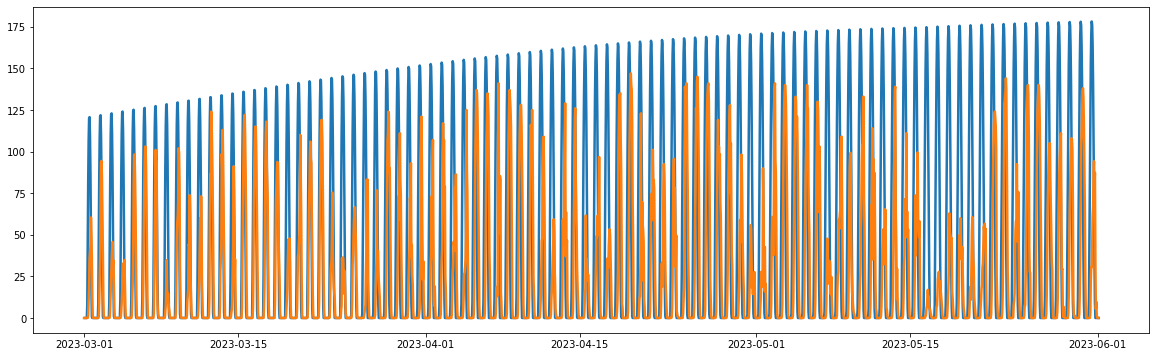

In [538]:
plt.plot(df_pred['power'])
plt.plot(data_frame_roof)
plt.show()

In [ ]:
precipitable_water = pvlib.atmosphere.gueymard94_pw(temp_air, relative_humidity)

In [ ]:
pvlib.atmosphere.angstrom_aod_at_lambda(aod0, lambda0, alpha=1.14, lambda1=700.0)

In [ ]:
model_bird = pvlib.clearsky.bird(solar_position['zenith'], airmass_r, aod380, aod500, precipitable_water, ozone=0.3, pressure=101325.0, dni_extra=1364.0, asymmetry=0.85, albedo=0.2)

## ONDULATEUR 